In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt




In [5]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def crop_to_aspect_ratio(image, target_aspect_ratio=(4, 4)):
    h, w = image.shape[:2]
    new_w = int(h * target_aspect_ratio[1] / target_aspect_ratio[0])
    new_h = int(w * target_aspect_ratio[0] / target_aspect_ratio[1])

    if new_w > w:
        y = 0
        x = (w - new_w) // 2
        cropped_image = image[y:y+h, x:x+new_w]
    else:
        x = 0
        y = (h - new_h) // 2
        cropped_image = image[y:y+new_h, x:x+w]

    return cropped_image



In [6]:

image_path = '/ibm.jpg'
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



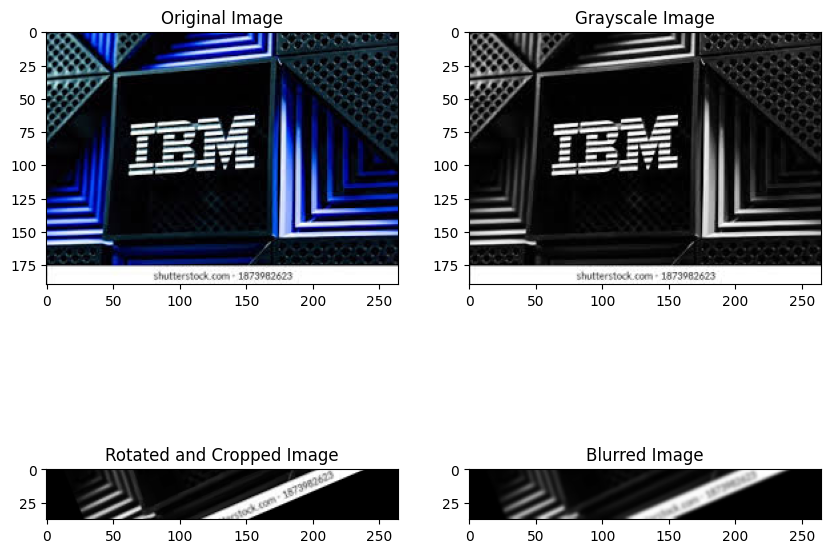

Pixel Values:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dimensions: (38, 265)


In [7]:

rotated_image = rotate_image(gray_image, 23)

#
cropped_image = crop_to_aspect_ratio(rotated_image)


blurred_image = cv2.GaussianBlur(cropped_image, (5, 5), 0)

pixel_values = blurred_image
dimensions = blurred_image.shape


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Rotated and Cropped Image')
plt.imshow(cropped_image, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')

plt.show()

# Print pixel values and dimensions
print("Pixel Values:\n", pixel_values)
print("Dimensions:", dimensions)